# Drugs Classification using KNN
The data was taken from Kaggle: [Drug Classification](https://www.kaggle.com/datasets/prathamtripathi/drug-classification)

In [41]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [42]:
data = pd.read_csv("drug200.csv")

Checking for empty rows / data

In [43]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [44]:
data.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


There are no missing values or rows

## Data Exploration / Analysis

Let us compare each column to the type of drug used 

### Age -> Drug

Let's see how age affects drug choice

<Axes: xlabel='Drug', ylabel='Age'>

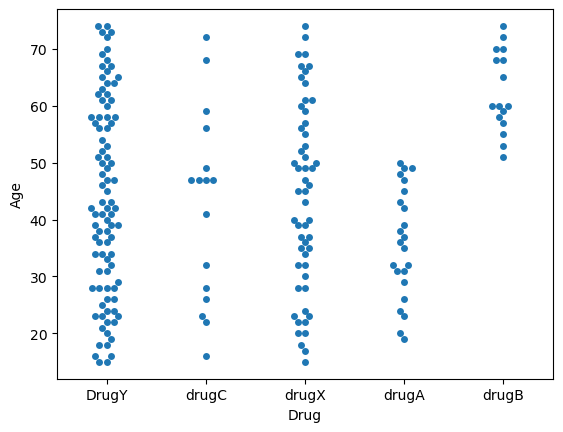

In [46]:
sns.swarmplot(x="Drug", y="Age", data=data)

It seems drugs there seems to be a change from drug A to B depending on age.

In [47]:
print("Drug A usage age ends at", data["Age"][data["Drug"] == "drugA"].max(), "years old")
print("Drug B usage age starts at", data["Age"][data["Drug"] == "drugB"].min(), "years old")

Drug A usage age ends at 50 years old
Drug B usage age starts at 51 years old


### Gender (Sex) -> Drug

Since the data is non numerical, let's group them first.

In [48]:
'''
=== A BETTER METHOD WAS FOUND ===

def groupby(first, second, group_data):
    first_arr = []
    second_arr = []
    count_arr = []

    for f in group_data[first].unique():
        for s in group_data[second].unique():
            count = group_data[first][group_data[first] == f][group_data[second] == s].count()

            first_arr.append(f)
            second_arr.append(s)
            count_arr.append(count)

    return pd.DataFrame({first: first_arr, second: second_arr, "Count": count_arr})
'''

'\n=== A BETTER METHOD WAS FOUND ===\n\ndef groupby(first, second, group_data):\n    first_arr = []\n    second_arr = []\n    count_arr = []\n\n    for f in group_data[first].unique():\n        for s in group_data[second].unique():\n            count = group_data[first][group_data[first] == f][group_data[second] == s].count()\n\n            first_arr.append(f)\n            second_arr.append(s)\n            count_arr.append(count)\n\n    return pd.DataFrame({first: first_arr, second: second_arr, "Count": count_arr})\n'

In [49]:
gender_drug = data.groupby(["Sex","Drug"]).size().reset_index(name = "Count")

gender_drug

,Sex,Drug,Count
0,F,DrugY,47
1,F,drugA,9
2,F,drugB,6
3,F,drugC,7
4,F,drugX,27
5,M,DrugY,44
6,M,drugA,14
7,M,drugB,10
8,M,drugC,9
9,M,drugX,27


Then let's see the bar graph to see how gender affects drug choice.

<Axes: xlabel='Drug', ylabel='Count'>

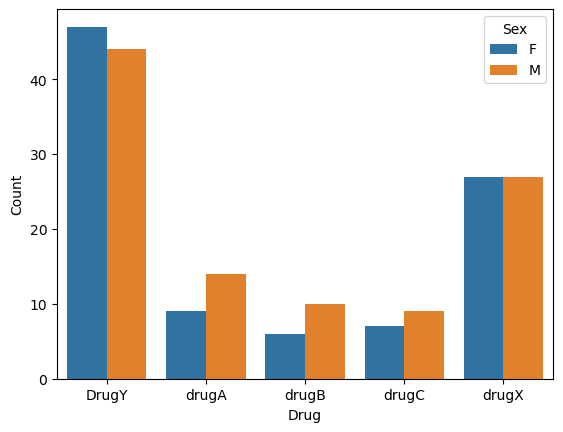

In [50]:
sns.barplot(x="Drug", y="Count", hue="Sex", data=gender_drug)

### Blood Pressure (BP) -> Drug

Since it's non numerical, we'll have to group them

In [51]:
bp_drug = data.groupby(["BP","Drug"]).size().reset_index(name = "Count")

bp_drug

,BP,Drug,Count
0,HIGH,DrugY,38
1,HIGH,drugA,23
2,HIGH,drugB,16
3,LOW,DrugY,30
4,LOW,drugC,16
5,LOW,drugX,18
6,NORMAL,DrugY,23
7,NORMAL,drugX,36


Then let's plot it to see how blood pressure affects drug choice

<Axes: xlabel='Drug', ylabel='Count'>

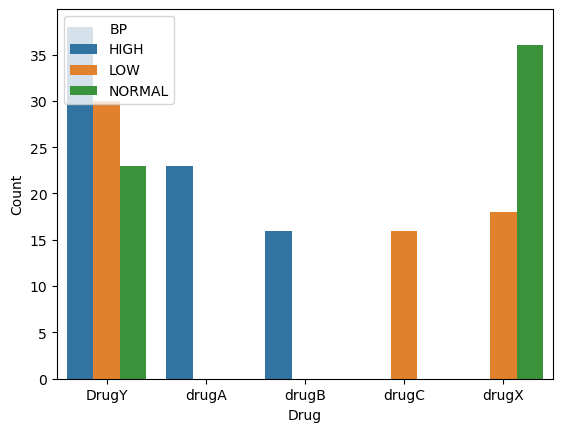

In [52]:
sns.barplot(x="Drug", y="Count", hue="BP", data=bp_drug)

- Drug A an B are only used by people with high blood pressure.
- Drug C is only used only used by people with low blood pressure.

### Cholesterol -> Drug

Since it's non numerical, we'll have to group them

In [53]:
chol_drug = data.groupby(["Cholesterol","Drug"]).size().reset_index(name = "Count")
chol_drug

,Cholesterol,Drug,Count
0,HIGH,DrugY,47
1,HIGH,drugA,12
2,HIGH,drugB,8
3,HIGH,drugC,16
4,HIGH,drugX,20
5,NORMAL,DrugY,44
6,NORMAL,drugA,11
7,NORMAL,drugB,8
8,NORMAL,drugX,34


Let's see how cholesterol levels affect drug choice

<Axes: xlabel='Drug', ylabel='Count'>

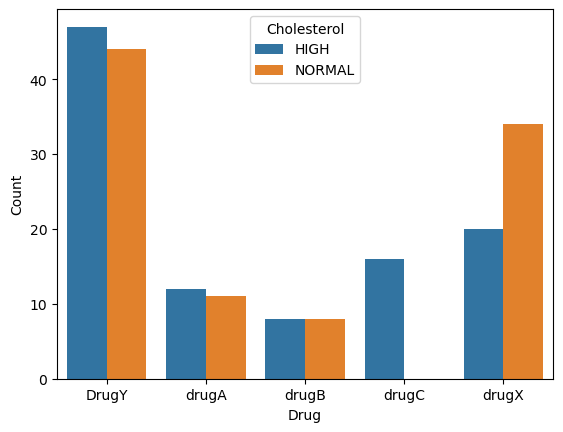

In [54]:
sns.barplot(x="Drug", y="Count", hue="Cholesterol", data=chol_drug)

Only people with high cholesterol take Drug C

### Sodium To Potassium Ratio in Blood -> Drug

Let's see how their Sodium to Potassium Ratio affects drug choice, as well as the correlation between Blood Pressure and Cholesterol.

<Axes: xlabel='Drug', ylabel='Na_to_K'>

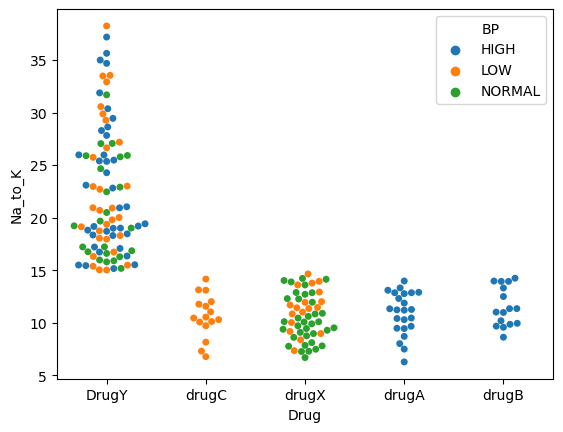

In [55]:
sns.swarmplot(x="Drug", y="Na_to_K", data=data, hue="BP")

- There seems to be correlation between low blood pressure and Na to K ratios of 15 or lower: They get drug C.
- There seems to be correlation between high blood pressure and Na to K ratios of 15 or lower: They get drug A or B.


<Axes: xlabel='Drug', ylabel='Na_to_K'>

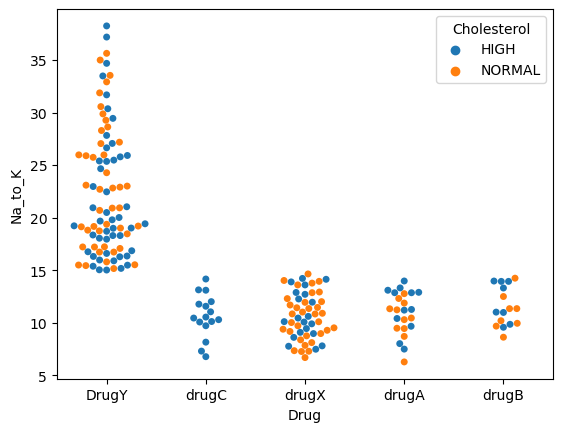

In [56]:
sns.swarmplot(x="Drug", y="Na_to_K", data=data, hue="Cholesterol")

People who take Drug C have the following attributes: 
- They have low blood pressure.
- They have high cholesterol.
- Their Sodium to Potassium ratio is lower than 15. 

## Machine Learning

### Data Processing / Splitting

In [57]:
X = data.drop(["Drug"], axis=1)
Y = data["Drug"]

Converting non_numerical data to numerical

In [58]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in X.columns:
    if not pd.api.types.is_numeric_dtype(X[col]):
        X[col] = le.fit_transform(X[col])
    

In [59]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


Splitting the data

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

Scaling the data

In [61]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(max_iter=5000)
lg.fit(X_train, Y_train)

LogisticRegression(max_iter=5000)

In [63]:
from sklearn.metrics import accuracy_score

lg_prediction = lg.predict(X_train)
lg_acc = accuracy_score(Y_train, lg_prediction)
print(str(round(lg_acc * 10000) / 100) + "% Accuracy")

95.62% Accuracy


### Random Forest Classififer

In [64]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, Y_train)

RandomForestClassifier()

In [65]:
from sklearn.metrics import accuracy_score

forest_prediction = forest.predict(X_train)
forest_acc = accuracy_score(Y_train, forest_prediction)
print(str(round(forest_acc * 10000) / 100) + "% Accuracy")

100.0% Accuracy


### KNN Classifier

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [67]:
from sklearn.metrics import accuracy_score

knn_prediction = knn.predict(X_train)
knn_acc = accuracy_score(Y_train, knn_prediction)
print(str(round(knn_acc * 10000) / 100) + "% Accuracy")

91.88% Accuracy


## Comparison of Models

We will now compare the scores of the models. Random Forest Classifier has the highest score whilst KNN has the lowest.

In [68]:
model_scores = {"Logistic Regression": lg_acc, "Random Forest Classifier": forest_acc, "KNeighborsClassifier": knn_acc}
pd.DataFrame.from_dict(model_scores, orient="index", columns=["Score"])

,Score
Logistic Regression,0.95625
Random Forest Classifier,1.00000
KNeighborsClassifier,0.91875


Now let's compare the data

In [69]:
model_predictions = {"Base": Y_train,"Logistic Regression": lg_prediction, "Random Forest Classifier": forest_prediction, "KNeighborsClassifier": knn_prediction}
pd.DataFrame(model_predictions)

,Base,Logistic Regression,Random Forest Classifier,KNeighborsClassifier
156,drugA,drugA,drugA,drugA
115,DrugY,DrugY,DrugY,DrugY
155,drugC,drugC,drugC,drugC
15,DrugY,DrugY,DrugY,DrugY
61,drugA,drugA,drugA,drugA
...,...,...,...,...
0,DrugY,DrugY,DrugY,DrugY
184,DrugY,DrugY,DrugY,DrugY
131,DrugY,DrugY,DrugY,DrugY
152,drugX,drugX,drugX,drugX
